In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.ar_model import AutoReg as AR

In [2]:
#importing all the classifyers

In [3]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.mixture import GaussianMixture
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import KMeans

In [4]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from scipy.optimize import linear_sum_assignment

In [5]:
from sklearn.linear_model import SGDClassifier
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [6]:
#importing modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [7]:
df = pd.read_csv('dataset_sdn.csv')
df.head()

,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,...,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
0,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,UDP,3,143928631,3917,0,0.0,0.0,0
1,11605,1,10.0.0.1,10.0.0.8,126395,134737070,280,734000000,2.810000e+11,2,...,451,0,UDP,4,3842,3520,0,0.0,0.0,0
2,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,1,3795,1242,0,0.0,0.0,0
3,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,2,3688,1492,0,0.0,0.0,0
4,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,3,3413,3665,0,0.0,0.0,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104345 entries, 0 to 104344
Data columns (total 23 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   dt           104345 non-null  int64  
 1   switch       104345 non-null  int64  
 2   src          104345 non-null  object 
 3   dst          104345 non-null  object 
 4   pktcount     104345 non-null  int64  
 5   bytecount    104345 non-null  int64  
 6   dur          104345 non-null  int64  
 7   dur_nsec     104345 non-null  int64  
 8   tot_dur      104345 non-null  float64
 9   flows        104345 non-null  int64  
 10  packetins    104345 non-null  int64  
 11  pktperflow   104345 non-null  int64  
 12  byteperflow  104345 non-null  int64  
 13  pktrate      104345 non-null  int64  
 14  Pairflow     104345 non-null  int64  
 15  Protocol     104345 non-null  object 
 16  port_no      104345 non-null  int64  
 17  tx_bytes     104345 non-null  int64  
 18  rx_bytes     104345 non-

In [9]:
df.describe()

,dt,switch,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,packetins,pktperflow,byteperflow,pktrate,Pairflow,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
count,104345.000000,104345.000000,104345.000000,1.043450e+05,104345.000000,1.043450e+05,1.043450e+05,104345.000000,104345.000000,104345.000000,1.043450e+05,104345.000000,104345.000000,104345.000000,1.043450e+05,1.043450e+05,104345.000000,103839.000000,103839.000000,104345.000000
mean,17927.514169,4.214260,52860.954746,3.818660e+07,321.497398,4.613880e+08,3.218865e+11,5.654234,5200.383468,6381.715291,4.716150e+06,212.210676,0.600987,2.331094,9.325264e+07,9.328039e+07,998.899756,1003.811420,2007.578742,0.390857
std,11977.642655,1.956327,52023.241460,4.877748e+07,283.518232,2.770019e+08,2.834029e+11,2.950036,5257.001450,7404.777808,7.560116e+06,246.855123,0.489698,1.084333,1.519380e+08,1.330004e+08,2423.471618,2054.887034,3144.437173,0.487945
min,2488.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,2.000000,4.000000,-130933.000000,-1.464426e+08,-4365.000000,0.000000,1.000000,2.527000e+03,8.560000e+02,0.000000,0.000000,0.000000,0.000000
25%,7098.000000,3.000000,808.000000,7.957600e+04,127.000000,2.340000e+08,1.270000e+11,3.000000,1943.000000,29.000000,2.842000e+03,0.000000,0.000000,1.000000,4.743000e+03,3.539000e+03,0.000000,0.000000,0.000000,0.000000
50%,11905.000000,4.000000,42828.000000,6.471930e+06,251.000000,4.180000e+08,2.520000e+11,5.000000,3024.000000,8305.000000,5.521680e+05,276.000000,1.000000,2.000000,4.219610e+06,1.338339e+07,0.000000,0.000000,4.000000,0.000000
75%,29952.000000,5.000000,94796.000000,7.620354e+07,412.000000,7.030000e+08,4.130000e+11,7.000000,7462.000000,10017.000000,9.728112e+06,333.000000,1.000000,3.000000,1.356398e+08,1.439277e+08,251.000000,557.000000,3838.000000,1.000000
max,42935.000000,10.000000,260006.000000,1.471280e+08,1881.000000,9.990000e+08,1.880000e+12,17.000000,25224.000000,19190.000000,1.495387e+07,639.000000,1.000000,5.000000,1.269982e+09,9.905962e+08,20580.000000,16577.000000,20580.000000,1.000000


In [10]:
column_names=df.columns
column_names

Index(['dt', 'switch', 'src', 'dst', 'pktcount', 'bytecount', 'dur',
       'dur_nsec', 'tot_dur', 'flows', 'packetins', 'pktperflow',
       'byteperflow', 'pktrate', 'Pairflow', 'Protocol', 'port_no', 'tx_bytes',
       'rx_bytes', 'tx_kbps', 'rx_kbps', 'tot_kbps', 'label'],
      dtype='object')

Text(0, 0.5, 'Count')

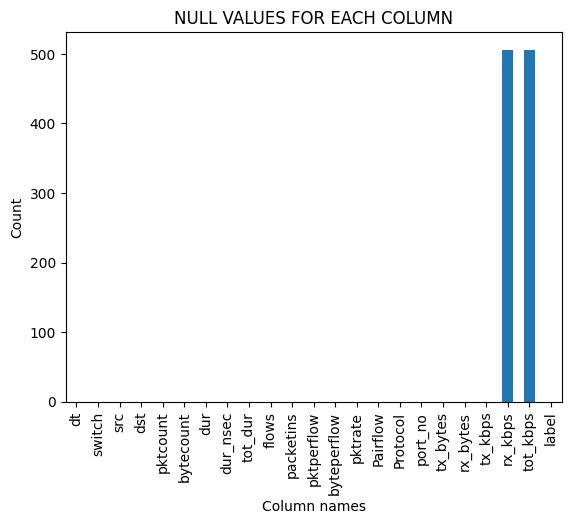

In [11]:
df.isnull().sum().plot.bar()
plt.title("NULL VALUES FOR EACH COLUMN")
plt.xlabel("Column names")
plt.ylabel("Count")

In [12]:
df=df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103839 entries, 0 to 104344
Data columns (total 23 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   dt           103839 non-null  int64  
 1   switch       103839 non-null  int64  
 2   src          103839 non-null  object 
 3   dst          103839 non-null  object 
 4   pktcount     103839 non-null  int64  
 5   bytecount    103839 non-null  int64  
 6   dur          103839 non-null  int64  
 7   dur_nsec     103839 non-null  int64  
 8   tot_dur      103839 non-null  float64
 9   flows        103839 non-null  int64  
 10  packetins    103839 non-null  int64  
 11  pktperflow   103839 non-null  int64  
 12  byteperflow  103839 non-null  int64  
 13  pktrate      103839 non-null  int64  
 14  Pairflow     103839 non-null  int64  
 15  Protocol     103839 non-null  object 
 16  port_no      103839 non-null  int64  
 17  tx_bytes     103839 non-null  int64  
 18  rx_bytes     103839 non-null 

In [13]:
uniq_dest=df['dst'].unique()
total_dst=len(uniq_dest)
print("TOTAL DESTINATION : ",total_dst)
print("DIFFERENT DESTINATION : ",uniq_dest)

TOTAL DESTINATION :  18
DIFFERENT DESTINATION :  ['10.0.0.8' '10.0.0.7' '10.0.0.3' '10.0.0.5' '10.0.0.10' '10.0.0.13'
 '10.0.0.1' '10.0.0.11' '10.0.0.2' '10.0.0.4' '10.0.0.9' '10.0.0.6'
 '10.0.0.14' '10.0.0.15' '10.0.0.12' '10.0.0.16' '10.0.0.17' '10.0.0.18']


Text(0.5, 1.0, 'TRAFFIC IDENTIFICATION FOR NORMAL AND MALICIOUS TRAFFIC')

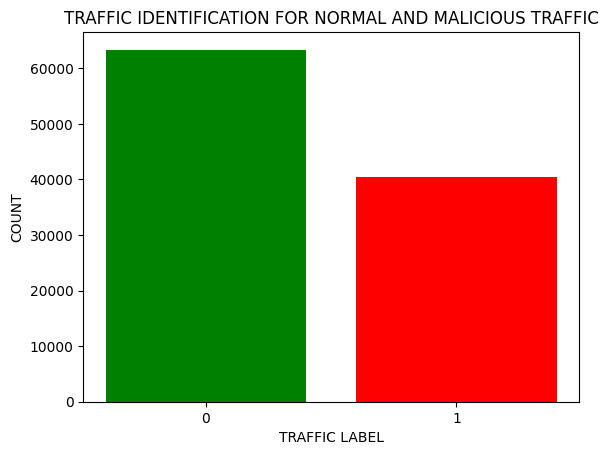

In [14]:
g=df.groupby('label')['label'].count()
plt.bar(list(g.index),list(g.values),color=['g','r'])
plt.xticks(list(g.index))
plt.xlabel("TRAFFIC LABEL")
plt.ylabel("COUNT")
plt.title("TRAFFIC IDENTIFICATION FOR NORMAL AND MALICIOUS TRAFFIC")

Text(0.5, 1.0, 'ATTACK AND NORMAL TRAFFIC')

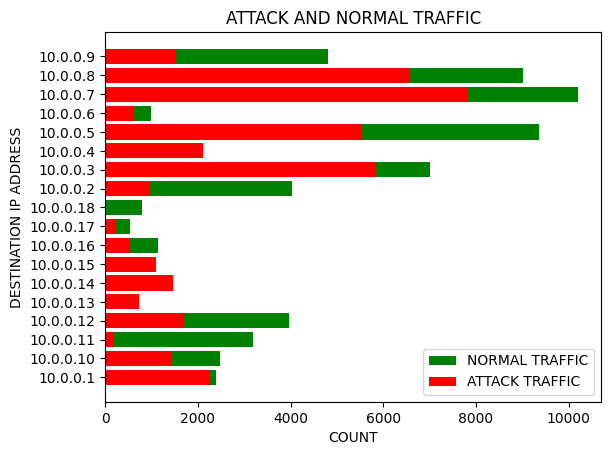

In [15]:
ip=df[df['label']==0].groupby('dst').count()['label'].index
normal=df.groupby(['dst','label']).size().unstack().fillna(0)[0]
attack=df.groupby(['dst','label']).size().unstack().fillna(0)[1]
plt.barh(ip,normal,color='g',label='NORMAL TRAFFIC')
plt.barh(ip,attack,color='r',label='ATTACK TRAFFIC')
plt.legend()
plt.xlabel("COUNT")
plt.ylabel("DESTINATION IP ADDRESS")
plt.title("ATTACK AND NORMAL TRAFFIC")

In [16]:
object_c=list(df.select_dtypes(include=['object']).columns)
object_c=object_c+['port_no']
print(object_c)
data=df.drop(columns=object_c)

udp_df=df[df['Protocol']=='UDP'].drop(columns=object_c)
tcp_df=df[df['Protocol']=='TCP'].drop(columns=object_c)
icmp_df=df[df['Protocol']=='ICMP'].drop(columns=object_c)
icmp_df

['src', 'dst', 'Protocol', 'port_no']


,dt,switch,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,packetins,pktperflow,byteperflow,pktrate,Pairflow,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
46116,26657,8,20,1960,21,201000000,2.120100e+10,3,10,0,0,0,1,5327,5327,0,0.0,0.0,0
46117,26657,8,20,1960,21,201000000,2.120100e+10,3,10,0,0,0,1,5457,3104,0,0.0,0.0,0
46118,26657,8,20,1960,21,201000000,2.120100e+10,3,10,0,0,0,1,3227,3185,0,0.0,0.0,0
46119,26657,8,20,1960,21,201000000,2.120100e+10,3,10,0,0,0,1,3357,1122,0,0.0,0.0,0
46120,26657,8,20,1960,21,43000000,2.104300e+10,3,10,0,0,0,1,5327,5327,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104340,5262,3,79,7742,81,842000000,8.184200e+10,5,10,29,2842,0,0,15209,12720,1,1.0,2.0,0
104341,5262,3,79,7742,81,842000000,8.184200e+10,5,10,29,2842,0,0,15099,14693,1,1.0,2.0,0
104342,5262,3,31,3038,31,805000000,3.180500e+10,5,10,30,2940,1,0,3409,3731,0,0.0,0.0,0
104343,5262,3,31,3038,31,805000000,3.180500e+10,5,10,30,2940,1,0,15209,12720,1,1.0,2.0,0


In [17]:
# data cleaning again for encoding

In [18]:
df = df.drop(['pktrate', 'byteperflow', 'pktperflow'], axis=1)
df.head()

,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,packetins,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
0,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,1943,0,UDP,3,143928631,3917,0,0.0,0.0,0
1,11605,1,10.0.0.1,10.0.0.8,126395,134737070,280,734000000,2.810000e+11,2,1943,0,UDP,4,3842,3520,0,0.0,0.0,0
2,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,1943,0,UDP,1,3795,1242,0,0.0,0.0,0
3,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,1943,0,UDP,2,3688,1492,0,0.0,0.0,0
4,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,1943,0,UDP,3,3413,3665,0,0.0,0.0,0


In [19]:
df.shape

(103839, 20)

In [20]:
df['src'].unique()

array(['10.0.0.1', '10.0.0.2', '10.0.0.4', '10.0.0.10', '10.0.0.3',
       '10.0.0.5', '10.0.0.13', '10.0.0.6', '10.0.0.20', '10.0.0.11',
       '10.0.0.12', '10.0.0.18', '10.0.0.8', '10.0.0.7', '10.0.0.9',
       '10.0.0.14', '10.0.0.15', '10.0.0.16', '10.0.0.17'], dtype=object)

In [21]:
df['dst'].unique()

array(['10.0.0.8', '10.0.0.7', '10.0.0.3', '10.0.0.5', '10.0.0.10',
       '10.0.0.13', '10.0.0.1', '10.0.0.11', '10.0.0.2', '10.0.0.4',
       '10.0.0.9', '10.0.0.6', '10.0.0.14', '10.0.0.15', '10.0.0.12',
       '10.0.0.16', '10.0.0.17', '10.0.0.18'], dtype=object)

In [22]:
df['Protocol'].unique()

array(['UDP', 'TCP', 'ICMP'], dtype=object)

In [23]:
df['src'] = [int(i.split('.')[3]) for i in df['src']]
df['dst'] = [int(i.split('.')[3]) for i in df['dst']]

In [24]:
df.head()

,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,packetins,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
0,11425,1,1,8,45304,48294064,100,716000000,1.010000e+11,3,1943,0,UDP,3,143928631,3917,0,0.0,0.0,0
1,11605,1,1,8,126395,134737070,280,734000000,2.810000e+11,2,1943,0,UDP,4,3842,3520,0,0.0,0.0,0
2,11425,1,2,8,90333,96294978,200,744000000,2.010000e+11,3,1943,0,UDP,1,3795,1242,0,0.0,0.0,0
3,11425,1,2,8,90333,96294978,200,744000000,2.010000e+11,3,1943,0,UDP,2,3688,1492,0,0.0,0.0,0
4,11425,1,2,8,90333,96294978,200,744000000,2.010000e+11,3,1943,0,UDP,3,3413,3665,0,0.0,0.0,0


In [25]:
df.shape

(103839, 20)

In [26]:
from sklearn.preprocessing import OneHotEncoder

In [27]:
print(df['Protocol'].value_counts())

Protocol
ICMP    41321
UDP     33082
TCP     29436
Name: count, dtype: int64


In [28]:
cat_vars = ['src', 'dst', 'Protocol']
encoder = OneHotEncoder()
encoded_vars = encoder.fit_transform(df[cat_vars])

df.drop(cat_vars, axis=1, inplace=True)
encoded_df = pd.DataFrame(encoded_vars.toarray(), columns=encoder.get_feature_names_out(cat_vars))
df = pd.concat([df, encoded_df], axis=1)

print(df.head())

        dt  switch  pktcount    bytecount    dur     dur_nsec       tot_dur  \
0  11425.0     1.0   45304.0   48294064.0  100.0  716000000.0  1.010000e+11   
1  11605.0     1.0  126395.0  134737070.0  280.0  734000000.0  2.810000e+11   
2  11425.0     1.0   90333.0   96294978.0  200.0  744000000.0  2.010000e+11   
3  11425.0     1.0   90333.0   96294978.0  200.0  744000000.0  2.010000e+11   
4  11425.0     1.0   90333.0   96294978.0  200.0  744000000.0  2.010000e+11   

   flows  packetins  Pairflow  ...  dst_12  dst_13  dst_14  dst_15  dst_16  \
0    3.0     1943.0       0.0  ...     0.0     0.0     0.0     0.0     0.0   
1    2.0     1943.0       0.0  ...     0.0     0.0     0.0     0.0     0.0   
2    3.0     1943.0       0.0  ...     0.0     0.0     0.0     0.0     0.0   
3    3.0     1943.0       0.0  ...     0.0     0.0     0.0     0.0     0.0   
4    3.0     1943.0       0.0  ...     0.0     0.0     0.0     0.0     0.0   

   dst_17  dst_18  Protocol_ICMP  Protocol_TCP  Protocol

In [29]:
df.columns

Index(['dt', 'switch', 'pktcount', 'bytecount', 'dur', 'dur_nsec', 'tot_dur',
       'flows', 'packetins', 'Pairflow', 'port_no', 'tx_bytes', 'rx_bytes',
       'tx_kbps', 'rx_kbps', 'tot_kbps', 'label', 'src_1', 'src_2', 'src_3',
       'src_4', 'src_5', 'src_6', 'src_7', 'src_8', 'src_9', 'src_10',
       'src_11', 'src_12', 'src_13', 'src_14', 'src_15', 'src_16', 'src_17',
       'src_18', 'src_20', 'dst_1', 'dst_2', 'dst_3', 'dst_4', 'dst_5',
       'dst_6', 'dst_7', 'dst_8', 'dst_9', 'dst_10', 'dst_11', 'dst_12',
       'dst_13', 'dst_14', 'dst_15', 'dst_16', 'dst_17', 'dst_18',
       'Protocol_ICMP', 'Protocol_TCP', 'Protocol_UDP'],
      dtype='object')

In [30]:
df = df.drop(['dt'], axis=1)
df

,switch,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,packetins,Pairflow,port_no,...,dst_12,dst_13,dst_14,dst_15,dst_16,dst_17,dst_18,Protocol_ICMP,Protocol_TCP,Protocol_UDP
0,1.0,45304.0,48294064.0,100.0,716000000.0,1.010000e+11,3.0,1943.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,126395.0,134737070.0,280.0,734000000.0,2.810000e+11,2.0,1943.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,90333.0,96294978.0,200.0,744000000.0,2.010000e+11,3.0,1943.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,90333.0,96294978.0,200.0,744000000.0,2.010000e+11,3.0,1943.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,90333.0,96294978.0,200.0,744000000.0,2.010000e+11,3.0,1943.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33425,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
33481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
33488,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
33494,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [31]:
#training and testing set

In [32]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

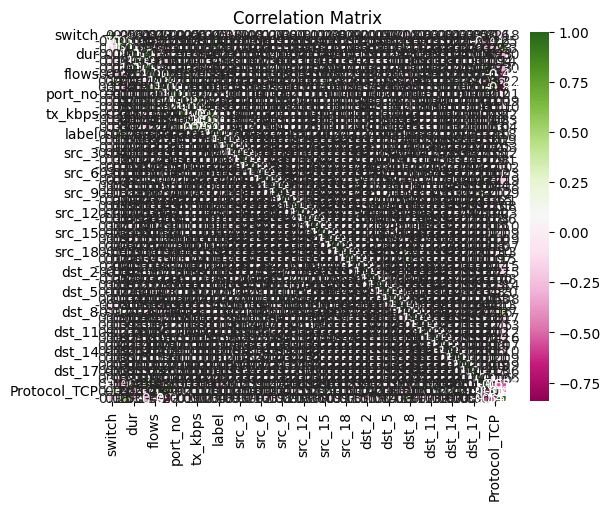

In [33]:
df.dropna(inplace=True)
x = df.drop('label', axis=1)
y = df['label']

#separating test and train set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)

#scalimg of train and test
scalar=StandardScaler()
x_train=scalar.fit_transform(x_train)
x_test=scalar.transform(x_test)

corr_matrix = df.corr()

#heatmap
sns.heatmap(corr_matrix, cmap='PiYG', annot=True, fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


In [34]:
#data normalization

In [35]:
x.columns

Index(['switch', 'pktcount', 'bytecount', 'dur', 'dur_nsec', 'tot_dur',
       'flows', 'packetins', 'Pairflow', 'port_no', 'tx_bytes', 'rx_bytes',
       'tx_kbps', 'rx_kbps', 'tot_kbps', 'src_1', 'src_2', 'src_3', 'src_4',
       'src_5', 'src_6', 'src_7', 'src_8', 'src_9', 'src_10', 'src_11',
       'src_12', 'src_13', 'src_14', 'src_15', 'src_16', 'src_17', 'src_18',
       'src_20', 'dst_1', 'dst_2', 'dst_3', 'dst_4', 'dst_5', 'dst_6', 'dst_7',
       'dst_8', 'dst_9', 'dst_10', 'dst_11', 'dst_12', 'dst_13', 'dst_14',
       'dst_15', 'dst_16', 'dst_17', 'dst_18', 'Protocol_ICMP', 'Protocol_TCP',
       'Protocol_UDP'],
      dtype='object')

In [36]:
from sklearn.preprocessing import MinMaxScaler

In [37]:
#selection of column
cols_to_norm = ['switch', 'pktcount', 'bytecount', 'dur', 'dur_nsec', 'tot_dur',
       'flows', 'packetins', 'Pairflow', 'port_no', 'tx_bytes', 'rx_bytes',
       'tx_kbps', 'rx_kbps', 'tot_kbps', 'src_1', 'src_2', 'src_3', 'src_4',
       'src_5', 'src_6', 'src_7', 'src_8', 'src_9', 'src_10', 'src_11',
       'src_12', 'src_13', 'src_14', 'src_15', 'src_16', 'src_17', 'src_18',
       'src_20', 'dst_1', 'dst_2', 'dst_3', 'dst_4', 'dst_5', 'dst_6', 'dst_7',
       'dst_8', 'dst_9', 'dst_10', 'dst_11', 'dst_12', 'dst_13', 'dst_14',
       'dst_15', 'dst_16', 'dst_17', 'dst_18', 'Protocol_ICMP', 'Protocol_TCP',
       'Protocol_UDP']

scaler = MinMaxScaler()

df[cols_to_norm] = scaler.fit_transform(df[cols_to_norm])

print(df.head())

   switch  pktcount  bytecount       dur  dur_nsec   tot_dur     flows  \
0     0.0  0.174242   0.328245  0.053163  0.716717  0.053723  0.066667   
1     0.0  0.486123   0.915781  0.148857  0.734735  0.149468  0.000000   
2     0.0  0.347427   0.654498  0.106326  0.744745  0.106915  0.066667   
3     0.0  0.347427   0.654498  0.106326  0.744745  0.106915  0.066667   
4     0.0  0.347427   0.654498  0.106326  0.744745  0.106915  0.066667   

   packetins  Pairflow  port_no  ...  dst_12  dst_13  dst_14  dst_15  dst_16  \
0   0.076883       0.0     0.50  ...     0.0     0.0     0.0     0.0     0.0   
1   0.076883       0.0     0.75  ...     0.0     0.0     0.0     0.0     0.0   
2   0.076883       0.0     0.00  ...     0.0     0.0     0.0     0.0     0.0   
3   0.076883       0.0     0.25  ...     0.0     0.0     0.0     0.0     0.0   
4   0.076883       0.0     0.50  ...     0.0     0.0     0.0     0.0     0.0   

   dst_17  dst_18  Protocol_ICMP  Protocol_TCP  Protocol_UDP  
0     0.0  

In [38]:
#model Analysis
import matplotlib.pyplot as plt
import numpy as np

def plot_confusion_matrix(y_true, y_pred, classes, normalize=False, cmap=plt.cm.Blues):
    cm = confusion_matrix(y_true, y_pred)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    #all ticks
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           xlabel='Predicted label',
           ylabel='True label')
    plt.setp(ax.get_xticklabels(), ha="right",
             rotation_mode="anchor")
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    
    fig.tight_layout()
    return ax 

In [39]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

def show_confusion_matrix(model, data, label, pred_label):
    class_names = ['Normal', 'Attack']
    
    plot_confusion_matrix(label, pred_label, classes=class_names, normalize=True, cmap=plt.cm.RdGy)
    
    plt.title('Confusion Matrix')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.show()

    print('\n')
    print(classification_report(label, pred_label))
    print(confusion_matrix(label, pred_label))
    print('\n')

In [40]:
#GNB
from sklearn.naive_bayes import GaussianNB

In [41]:
gnb = GaussianNB()

gnb.fit(x_train, y_train.values.ravel())
y_test_pred_gnb = gnb.predict(x_test)

In [42]:
print("Train score is:", gnb.score(x_train, y_train))
print("Test score is:", gnb.score(x_test, y_test))

Train score is: 0.6403237122880023
Test score is: 0.6422315769100498


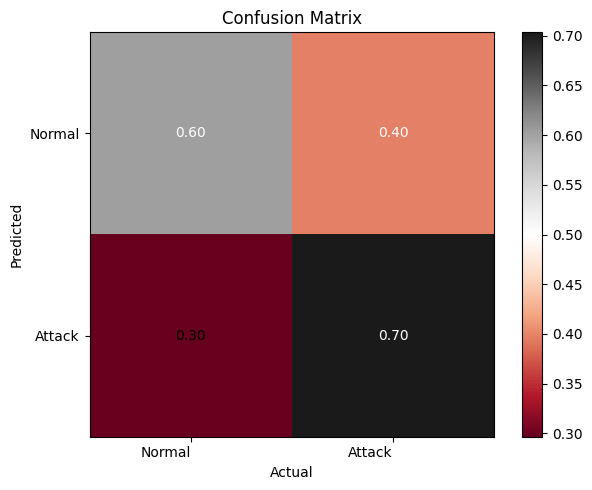



              precision    recall  f1-score   support

         0.0       0.75      0.60      0.67     12448
         1.0       0.54      0.70      0.61      8219

    accuracy                           0.64     20667
   macro avg       0.65      0.65      0.64     20667
weighted avg       0.67      0.64      0.65     20667

[[7491 4957]
 [2437 5782]]




In [43]:
show_confusion_matrix(gnb,x_test,y_test,y_test_pred_gnb)

In [44]:
#LR
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='liblinear',multi_class='ovr')
lr.fit(x_train, y_train) 
y_pred_lr = lr.predict(x_test)

In [45]:
print("Train score is:", lr.score(x_train, y_train))
print("Test score is:", lr.score(x_test, y_test))

Train score is: 0.744514068661844
Test score is: 0.7482943823486718


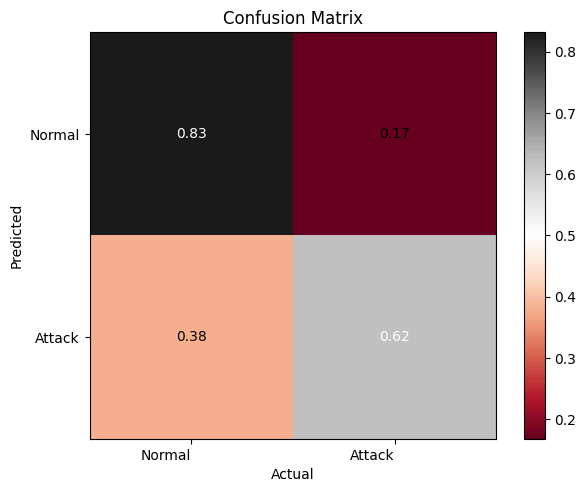



              precision    recall  f1-score   support

         0.0       0.77      0.83      0.80     12448
         1.0       0.71      0.62      0.66      8219

    accuracy                           0.75     20667
   macro avg       0.74      0.73      0.73     20667
weighted avg       0.75      0.75      0.74     20667

[[10357  2091]
 [ 3111  5108]]




In [46]:
show_confusion_matrix(lr,x_test,y_test,y_pred_lr)

In [47]:
#Decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold

In [48]:
from sklearn.model_selection import GridSearchCV
folds = KFold(n_splits = 2, shuffle = True, random_state = 10)

hyper_params = [ {'criterion' : ['gini', 'entropy'],
                     'max_depth': [None,1,2,3,4,5]}]
model = DecisionTreeClassifier()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      
#fit the model
model_cv.fit(x_train, y_train)

#result
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

Fitting 2 folds for each of 12 candidates, totalling 24 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,mean_train_score,std_train_score
0,1.013773,0.020320,0.023604,0.000636,gini,None,"{'criterion': 'gini', 'max_depth': None}",0.990685,0.992210,0.991448,0.000762,2,1.000000,1.000000,1.000000,0.000000
1,0.129388,0.000204,0.020545,0.000096,gini,1,"{'criterion': 'gini', 'max_depth': 1}",0.692135,0.690804,0.691469,0.000665,11,0.690804,0.692135,0.691469,0.000665
2,0.266707,0.046595,0.019660,0.000361,gini,2,"{'criterion': 'gini', 'max_depth': 2}",0.750054,0.750296,0.750175,0.000121,9,0.750538,0.750006,0.750272,0.000266
3,0.305853,0.011572,0.020825,0.003187,gini,3,"{'criterion': 'gini', 'max_depth': 3}",0.787748,0.786321,0.787035,0.000714,7,0.786248,0.787918,0.787083,0.000835
4,0.564107,0.186525,0.021582,0.000588,gini,4,"{'criterion': 'gini', 'max_depth': 4}",0.812644,0.814119,0.813382,0.000738,6,0.814966,0.812015,0.813490,0.001476
5,0.500740,0.016898,0.021587,0.000425,gini,5,"{'criterion': 'gini', 'max_depth': 5}",0.818716,0.843394,0.831055,0.012339,3,0.818329,0.842426,0.830378,0.012048
6,0.920319,0.163396,0.022279,0.000267,entropy,None,"{'criterion': 'entropy', 'max_depth': None}",0.993250,0.992887,0.993068,0.000181,1,1.000000,1.000000,1.000000,0.000000
7,0.132964,0.002565,0.020005,0.000553,entropy,1,"{'criterion': 'entropy', 'max_depth': 1}",0.691554,0.690151,0.690852,0.000702,12,0.690151,0.691554,0.690852,0.000702
8,0.237703,0.021271,0.018549,0.001458,entropy,2,"{'criterion': 'entropy', 'max_depth': 2}",0.747998,0.748337,0.748167,0.000169,10,0.748337,0.747998,0.748167,0.000169
9,0.301294,0.020447,0.020198,0.000817,entropy,3,"{'criterion': 'entropy', 'max_depth': 3}",0.787845,0.781530,0.784688,0.003157,8,0.786297,0.783514,0.784906,0.001391


In [49]:
#Accuracy and hyperparameter
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.9930684924878426 corresponding to hyperparameters {'criterion': 'entropy', 'max_depth': None}


In [50]:
dtree = DecisionTreeClassifier()
dtree.fit(x_train, y_train)
#predict test
y_pred_dt = dtree.predict(x_test)
#accuracy of our model
count_misclassified = (y_test != y_pred_dt).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = accuracy_score(y_test, y_pred_dt)
print('Accuracy: {:.2f}'.format(accuracy))

Misclassified samples: 157
Accuracy: 0.99


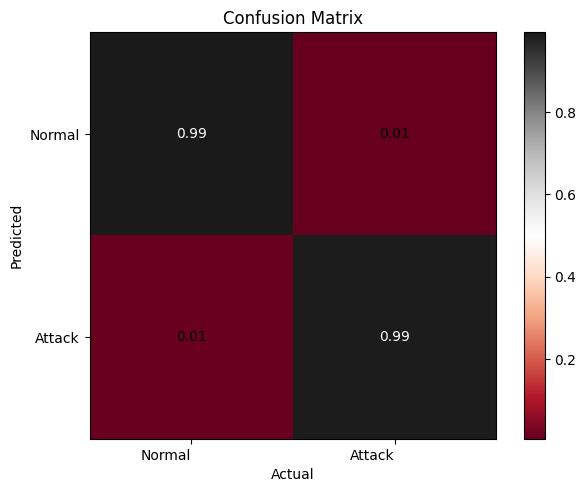



              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99     12448
         1.0       0.99      0.99      0.99      8219

    accuracy                           0.99     20667
   macro avg       0.99      0.99      0.99     20667
weighted avg       0.99      0.99      0.99     20667

[[12377    71]
 [   86  8133]]


[[12377    71]
 [   86  8133]]
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99     12448
         1.0       0.99      0.99      0.99      8219

    accuracy                           0.99     20667
   macro avg       0.99      0.99      0.99     20667
weighted avg       0.99      0.99      0.99     20667



Index(['switch', 'pktcount', 'bytecount', 'dur', 'dur_nsec', 'tot_dur',
       'flows', 'packetins', 'Pairflow', 'port_no', 'tx_bytes', 'rx_bytes',
       'tx_kbps', 'rx_kbps', 'tot_kbps', 'src_1', 'src_2', 'src_3', 'src_4',
       'src_5', 'src_6', 'src_7', 'src_8', 'src_9', 'src_10', 'src_11',
       'src_12', 'src_13', 'src_14', 'src_15', 'src_16', 'src_17', 'src_18',
       'src_20', 'dst_1', 'dst_2', 'dst_3', 'dst_4', 'dst_5', 'dst_6', 'dst_7',
       'dst_8', 'dst_9', 'dst_10', 'dst_11', 'dst_12', 'dst_13', 'dst_14',
       'dst_15', 'dst_16', 'dst_17', 'dst_18', 'Protocol_ICMP', 'Protocol_TCP',
       'Protocol_UDP'],
      dtype='object')

In [51]:
show_confusion_matrix(dtree,x_test,y_test,y_pred_dt)
print(confusion_matrix(y_test,y_pred_dt))
print(classification_report(y_test,y_pred_dt))
x.columns

In [52]:
#LSTM

In [53]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout, Activation ,Dense

In [54]:
print('Build model...')
model = Sequential()
model.add(LSTM(80, return_sequences=False, input_shape=(71,1)))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.add(Activation('sigmoid'))

Build model...


In [55]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

In [56]:
history=model.fit(x_train, y_train, epochs = 20, batch_size=64,validation_data=(x_test, y_test),verbose=1)

Epoch 1/20
1292/1292 ━━━━━━━━━━━━━━━━━━━━ 81s 60ms/step - acc: 0.6285 - loss: 0.6290 - val_acc: 0.6704 - val_loss: 0.5890
Epoch 2/20
1292/1292 ━━━━━━━━━━━━━━━━━━━━ 62s 48ms/step - acc: 0.6884 - loss: 0.5685 - val_acc: 0.6788 - val_loss: 0.5867
Epoch 3/20
1292/1292 ━━━━━━━━━━━━━━━━━━━━ 62s 48ms/step - acc: 0.7074 - loss: 0.5492 - val_acc: 0.7631 - val_loss: 0.4774
Epoch 4/20
1292/1292 ━━━━━━━━━━━━━━━━━━━━ 61s 47ms/step - acc: 0.7797 - loss: 0.4366 - val_acc: 0.8250 - val_loss: 0.3619
Epoch 5/20
1292/1292 ━━━━━━━━━━━━━━━━━━━━ 65s 50ms/step - acc: 0.8298 - loss: 0.3448 - val_acc: 0.8453 - val_loss: 0.3116
Epoch 6/20
1292/1292 ━━━━━━━━━━━━━━━━━━━━ 62s 48ms/step - acc: 0.8588 - loss: 0.2900 - val_acc: 0.8724 - val_loss: 0.2578
Epoch 7/20
1292/1292 ━━━━━━━━━━━━━━━━━━━━ 83s 48ms/step - acc: 0.8756 - loss: 0.2568 - val_acc: 0.8957 - val_loss: 0.2176
Epoch 8/20
1292/1292 ━━━━━━━━━━━━━━━━━━━━ 85s 51ms/step - acc: 0.8901 - loss: 0.2277 - val_acc: 0.9097 - val_loss: 0.2024
Epoch 9/20
1292/1292 ━━━

In [57]:
# Final evaluation  by the model
scores = model.evaluate(x_test, y_test, verbose=1)
print("ACCURACY: %.2f%%" % (scores[1]*100))

646/646 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - acc: 0.9504 - loss: 0.1211
ACCURACY: 95.36%


In [58]:
y_pred = model.predict(x_test)
predict= np.round(y_pred)
confusion_matrix(y_test,predict)
print('\n')
print(classification_report(y_test,predict))

646/646 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step


              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96     12448
         1.0       0.94      0.94      0.94      8219

    accuracy                           0.95     20667
   macro avg       0.95      0.95      0.95     20667
weighted avg       0.95      0.95      0.95     20667



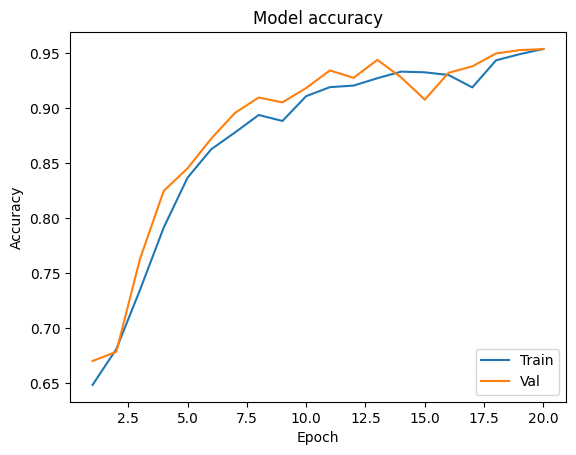

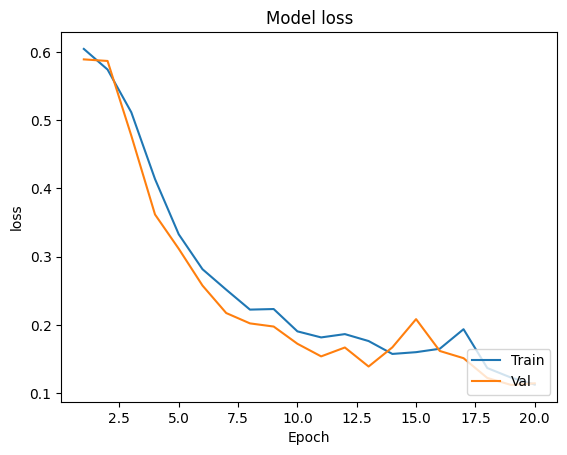

In [59]:
#model accuracy and loss
epochs=20
def plot_learningCurve(history,epochs):
    #ACCURACY
    epochs_range=range(1,epochs+1)
    plt.plot(epochs_range,history.history['acc'])
    plt.plot(epochs_range,history.history['val_acc'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train','Val'],loc='lower right')
    plt.show()
    #LOSS
    plt.plot(epochs_range,history.history['loss'])
    plt.plot(epochs_range,history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('loss')
    plt.xlabel('Epoch')
    plt.legend(['Train','Val'],loc='lower right')
    plt.show()
plot_learningCurve(history,epochs)

In [60]:
#ANALYSIS OF TOOLS USED
from sklearn.metrics import roc_curve, auc

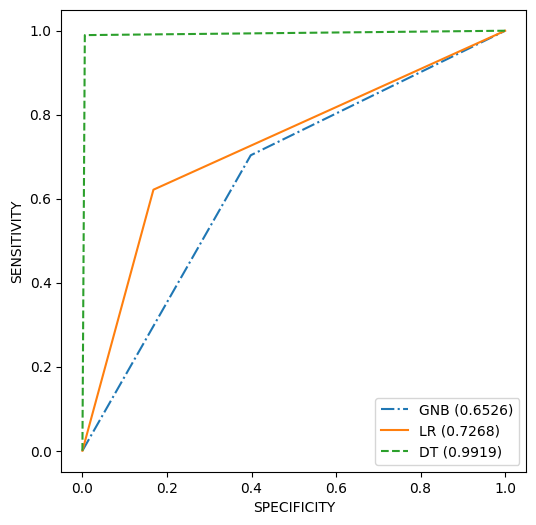

In [61]:
l_fpr, l_tpr, threshold1 = roc_curve(y_test, y_pred_lr)
g_fpr, g_tpr, threshold2 = roc_curve(y_test, y_test_pred_gnb)
d_fpr, d_tpr, threshold4 = roc_curve(y_test, y_pred_dt)

auc_l = auc(l_fpr, l_tpr)
auc_g = auc(g_fpr, g_tpr)
auc_d = auc(d_fpr, d_tpr)

plt.figure(figsize=(6,6), dpi=100)
plt.plot(g_fpr, g_tpr, linestyle='-.', label='GNB (%.4f)' %auc_g)
plt.plot(l_fpr, l_tpr, linestyle='-', label='LR (%.4f)' %auc_l)
plt.plot(d_fpr, d_tpr, linestyle='--', label='DT (%.4f)' %auc_d)

plt.xlabel('SPECIFICITY')
plt.ylabel('SENSITIVITY')
plt.legend()

plt.show()